In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/Mercado/mercado.csv")

In [10]:
data.head().T

,0,1,2,3,4
Invoice ID,750-67-8428,226-31-3081,631-41-3108,123-19-1176,373-73-7910
Branch,A,C,A,A,A
City,Yangon,Naypyitaw,Yangon,Yangon,Yangon
Customer type,Member,Normal,Normal,Member,Normal
Gender,Female,Female,Male,Male,Male
Product line,Health and beauty,Electronic accessories,Home and lifestyle,Health and beauty,Sports and travel
Unit price,74.69,15.28,46.33,58.22,86.31
Quantity,7,5,7,8,7
Tax 5%,26.1415,3.82,16.2155,23.288,30.2085
Total,548.971,80.22,340.526,489.048,634.379


In [4]:
data['data_conv'] = pd.to_datetime(data['Date'])

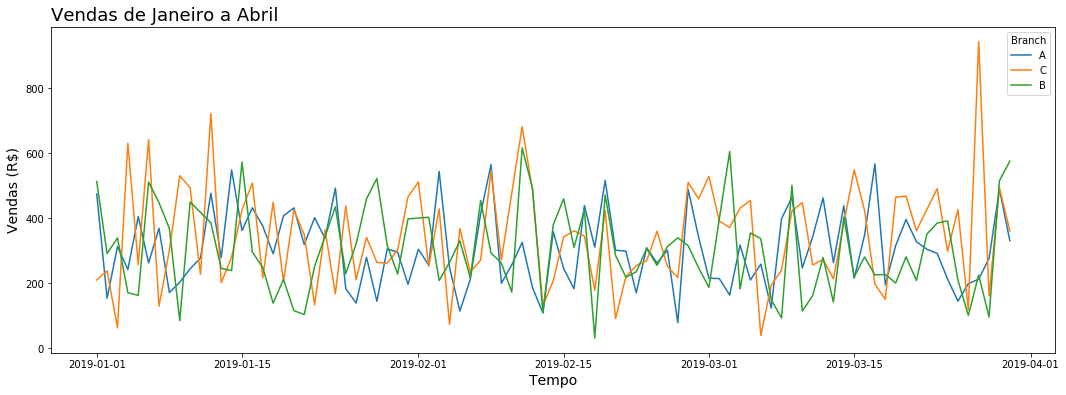

In [20]:
ax = sns.lineplot(x='data_conv', y='Total', data=data, hue="Branch", ci=None)
ax.figure.set_size_inches(18,6)
ax.set_title("Vendas de Janeiro a Abril", loc='left', fontsize=18)
ax.set_xlabel("Tempo", fontsize=14)
ax.set_ylabel("Vendas (R$)", fontsize=14)
ax = ax

In [21]:
frequencia = pd.crosstab(data["Customer type"], data.Gender)
tipo_pagamento = pd.crosstab(data["Payment"], data.Branch)

In [22]:
# frequencia
tipo_pagamento

Branch,A,B,C
Payment,,,
Cash,110,110,124
Credit card,104,109,98
Ewallet,126,113,106


In [11]:
data.groupby("Branch").mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059
B,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
C,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866


In [37]:
def toYear(x):
    return x.split("/")[2]

data["Year"] = data.Date.apply(toYear)

In [39]:
data["Year"].unique()

array(['2019'], dtype=object)

In [40]:
def toYearMonth(x):
    return x.split("/")[2] + "_" + x.split("/")[0]
# 
data["year_month"] = data.Date.apply(toYearMonth)

In [46]:
data.groupby("year_month").mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
year_month,,,,,,,,
2019_1,56.119006,5.582386,15.732125,330.374625,314.642500,4.761905,15.732125,7.017614
2019_2,56.632079,5.458746,15.278858,320.856020,305.577162,4.761905,15.278858,7.071287
2019_3,54.373101,5.481159,15.107730,317.262339,302.154609,4.761905,15.107730,6.840290


In [55]:
# data[""].unique()
frequencia2 = pd.crosstab(data["Total"], data.City)

In [57]:
data.groupby("City").mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866
Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059


Text(0.5, 1.0, 'Product sales on the basis of gender')

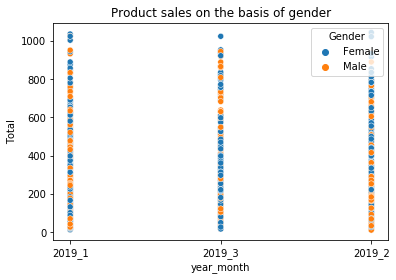

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.scatterplot(x= "year_month", y = "Total", hue = "Gender", data = data).set_title("Product sales on the basis of gender")

In [38]:
# plt.figure(figsize=(12, 5))
# plt.title('Total Monthly transaction by Gender')
# sns.countplot(x='Product line', hue = 'Gender', data=data)
# plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
# new_data = data

In [53]:
data_cat = data.drop(["Unit price", "Quantity", "Tax 5%", "Total", "cogs", "gross margin percentage", "gross income", "Rating"], axis=1)

In [54]:
data_cont = data[["Unit price", "Quantity", "Tax 5%", "Total", "cogs", "gross margin percentage", "gross income", "Rating"]]

In [55]:
data_cat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment,data_conv
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet,2019-01-05
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash,2019-03-08
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card,2019-03-03
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet,2019-01-27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet,2019-02-08


In [57]:
scaler = StandardScaler()
data_scalled = scaler.fit(data_cont)

In [63]:
data_scalled = scaler.transform(data_cont) 

In [66]:
data_cont.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [89]:
data_cat["Rating"] = data_scalled.T[7]

In [90]:
data_cat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment,data_conv,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet,2019-01-05,0.718160,0.509930,0.919607,0.919607,0.919607,0.0,0.919607,1.238443
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash,2019-03-08,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,0.0,-0.987730,1.529527
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card,2019-03-03,-0.352781,0.509930,0.071446,0.071446,0.071446,0.0,0.071446,0.248760
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet,2019-01-27,0.096214,0.852165,0.675780,0.675780,0.675780,0.0,0.675780,0.830927
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet,2019-02-08,1.156959,0.509930,1.267125,1.267125,1.267125,0.0,1.267125,-0.973790


In [93]:
from sklearn.cluster import KMeans

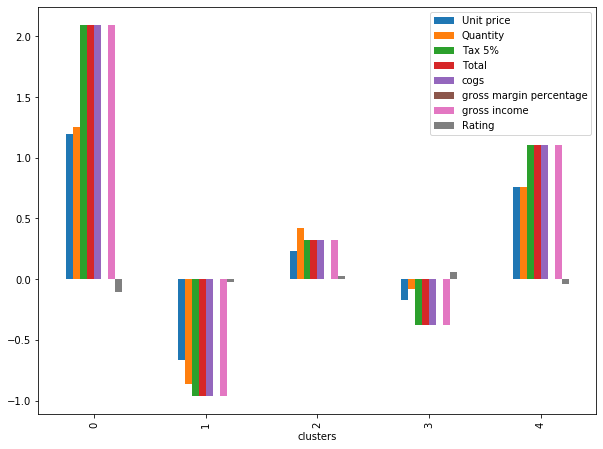

In [94]:
data_array = data_cont.values
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
data_cat["clusters"] = kmeans.fit_predict(data_array)
# data.groupby("clusters").aggregate("mean")
data_cat.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))